In [14]:
import pandas as pd
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os
from PIL import Image
from pathlib import Path
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Option 1 to read images from directory


In [27]:
def load_images_from_folder(folder, image_size=(224,224)):
  images = []
  labels = []
  for label in os.listdir(folder):
      label_path = os.path.join(folder, label)
      if os.path.isdir(label_path):
          for filename in os.listdir(label_path):
              img_path = os.path.join(label_path, filename)
              if os.path.isfile(img_path):
                  img = Image.open(img_path)
                  img = img.resize(image_size)
                  img = np.array(img)
                  images.append(img)
                  labels.append(label)
  return np.array(images), np.array(labels)

In [28]:
FOLDER_PATH = '/content/gdrive/MyDrive/jelly_fish_dataset'

X, y = load_images_from_folder(FOLDER_PATH)

In [29]:
X.shape, y.shape

((900, 224, 224, 3), (900,))

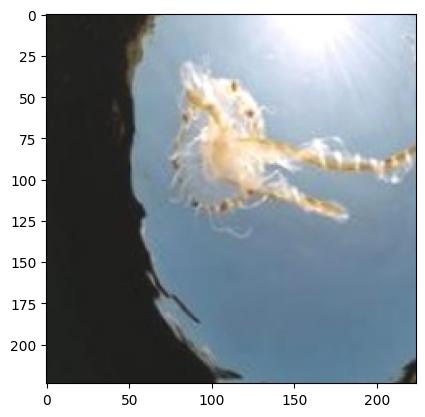

In [54]:
plt.imshow(X[0])

In [47]:
X = X / 255.0

In [48]:
labelencoder = LabelEncoder()

y = labelencoder.fit_transform(y)

In [50]:
y = to_categorical(y)
y

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

In [51]:
y.shape

(900, 6)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((720, 224, 224, 3), (180, 224, 224, 3), (720, 6), (180, 6))

In [55]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(labelencoder.classes_), activation='softmax')
])

In [56]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 flatten_1 (Flatten)         (None, 346112)           

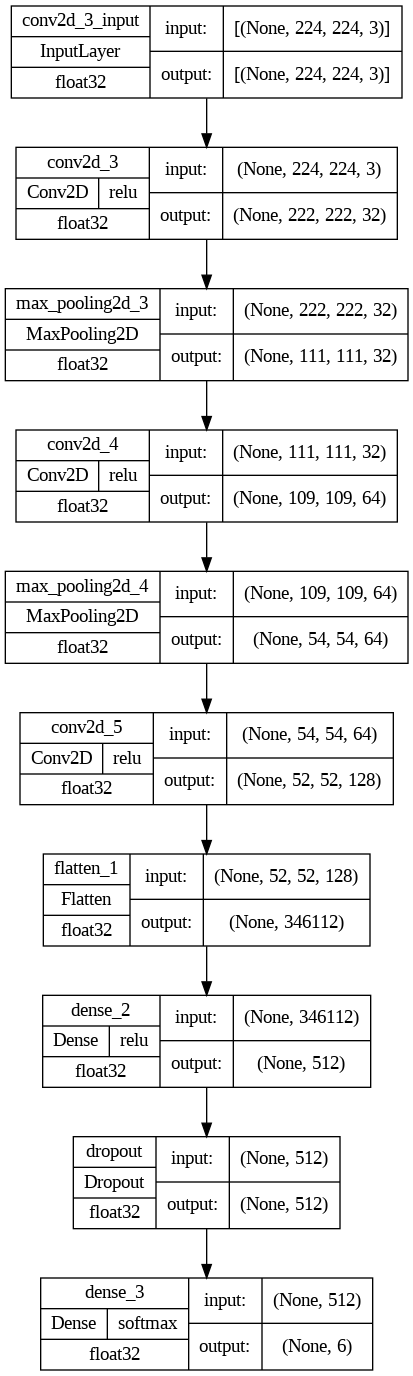

In [58]:
plot_model(model, show_dtype=True, show_shapes=True, show_layer_activations=True, show_layer_names=True)

In [59]:
model.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics='accuracy'
)

In [60]:
history = model.fit(X_train, y_train, batch_size=32, epochs=5)

Epoch 1/5
23/23 [==============================] - 171s 7s/step - loss: 3.2981 - accuracy: 0.2764
Epoch 2/5
23/23 [==============================] - 164s 7s/step - loss: 1.4051 - accuracy: 0.4444
Epoch 3/5
23/23 [==============================] - 168s 7s/step - loss: 1.2166 - accuracy: 0.5264
Epoch 4/5
23/23 [==============================] - 200s 9s/step - loss: 0.9816 - accuracy: 0.6319
Epoch 5/5
23/23 [==============================] - 165s 7s/step - loss: 0.6856 - accuracy: 0.7625


In [61]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 12s 2s/step - loss: 1.0964 - accuracy: 0.5889


[1.0963952541351318, 0.5888888835906982]

### Option 2 to read images from directory

In [3]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (224, 224))
            images.append(img)
    return images

In [4]:
moon_jellyfish_folder = '/content/gdrive/MyDrive/jelly_fish_dataset/Moon_jellyfish'
barrel_jellyfish_folder = '/content/gdrive/MyDrive/jelly_fish_dataset/barrel_jellyfish'
blue_jellyfish_folder = '/content/gdrive/MyDrive/jelly_fish_dataset/blue_jellyfish'
compass_jellyfish_folder = '/content/gdrive/MyDrive/jelly_fish_dataset/compass_jellyfish'
lions_mane_jellyfish = '/content/gdrive/MyDrive/jelly_fish_dataset/lions_mane_jellyfish'
mauve_stinger_jellyfish = '/content/gdrive/MyDrive/jelly_fish_dataset/mauve_stinger_jellyfish'

moon_images = load_images_from_folder(moon_jellyfish_folder)
barrel_images = load_images_from_folder(barrel_jellyfish_folder)
blue_images = load_images_from_folder(blue_jellyfish_folder)
compass_images = load_images_from_folder(compass_jellyfish_folder)
lions_mane_images = load_images_from_folder(lions_mane_jellyfish)
mauve_stinger_images = load_images_from_folder(mauve_stinger_jellyfish)

In [5]:
moon_labels = [0] * len(moon_images)
barrel_labels = [1] * len(barrel_images)
blue_labels = [2] * len(blue_images)
compass_labels = [3] * len(compass_images)
lions_mane_labels = [4] * len(lions_mane_images)
mauve_stinger_labels = [5] * len(mauve_stinger_images)

In [6]:
all_images =  moon_images + barrel_images + blue_images + compass_images + lions_mane_images + mauve_stinger_images

In [7]:
all_labels = moon_labels+barrel_labels+blue_labels+compass_labels+lions_mane_labels+mauve_stinger_labels

In [8]:
X = np.array(all_images)
y = np.array(all_labels)

In [9]:
X.shape, y.shape

((900, 224, 224), (900,))

In [10]:
X = X / 255.0

In [11]:
labelencoder = LabelEncoder()

y = labelencoder.fit_transform(y)

In [12]:
y = to_categorical(y)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((720, 224, 224), (180, 224, 224), (720, 6), (180, 6))

In [14]:
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

X_train = np.concatenate([X_train] * 3, axis=-1)
X_test = np.concatenate([X_test] * 3, axis=-1)

In [15]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(labelencoder.classes_), activation='softmax')
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 flatten (Flatten)           (None, 346112)            0

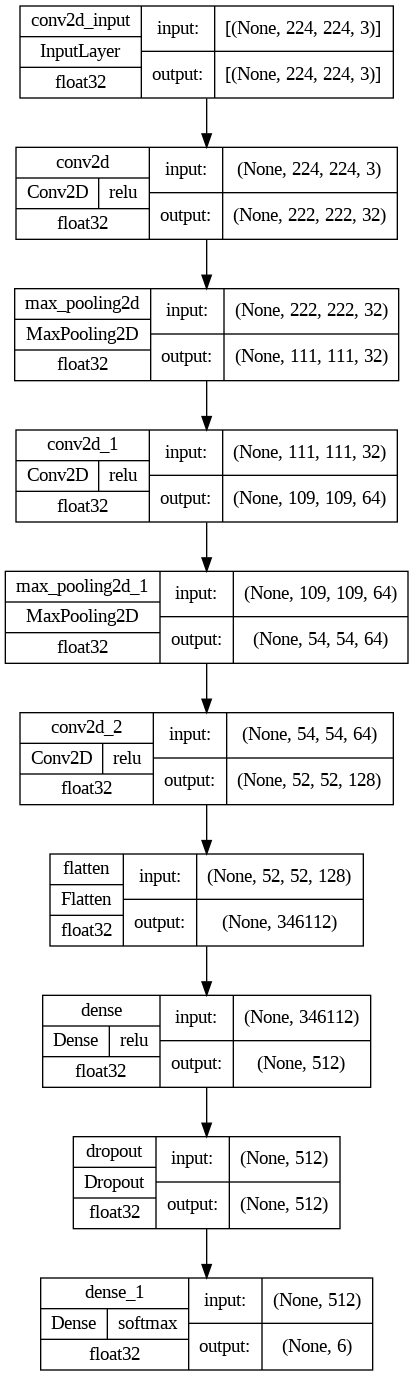

In [17]:
plot_model(model, show_dtype=True, show_shapes=True, show_layer_activations=True, show_layer_names=True)

In [18]:
model.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics='accuracy'
)

In [19]:
history = model.fit(X_train, y_train, batch_size=32, epochs=5)

Epoch 1/5
23/23 [==============================] - 232s 10s/step - loss: 4.5274 - accuracy: 0.2111
Epoch 2/5
23/23 [==============================] - 163s 7s/step - loss: 1.6491 - accuracy: 0.2847
Epoch 3/5
23/23 [==============================] - 172s 8s/step - loss: 1.4432 - accuracy: 0.4417
Epoch 4/5
23/23 [==============================] - 203s 9s/step - loss: 1.0913 - accuracy: 0.5806
Epoch 5/5
23/23 [==============================] - 175s 8s/step - loss: 0.7470 - accuracy: 0.7417


### Option 3 to read images from directory

In [43]:
import tensorflow as tf

FOLDER_PATH = '/content/gdrive/MyDrive/jelly_fish_dataset'

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    FOLDER_PATH,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(224, 224),
    batch_size=32
)

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    FOLDER_PATH,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(224, 224),
    batch_size=32
)

Found 1879 files belonging to 7 classes.
Using 1504 files for training.
Found 1879 files belonging to 7 classes.
Using 375 files for validation.


In [40]:
model = Sequential([
    InputLayer(input_shape=(224, 224, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(train_dataset.class_names), activation='softmax')
])

In [41]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [45]:
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=5
)

Epoch 1/5
47/47 [==============================] - 213s 5s/step - loss: 1.9167 - accuracy: 0.4801 - val_loss: 1.8802 - val_accuracy: 0.4293
Epoch 2/5
47/47 [==============================] - 192s 4s/step - loss: 1.6848 - accuracy: 0.5047 - val_loss: 1.7923 - val_accuracy: 0.4667
Epoch 3/5
47/47 [==============================] - 200s 4s/step - loss: 1.5838 - accuracy: 0.5047 - val_loss: 1.8356 - val_accuracy: 0.4667
Epoch 4/5
47/47 [==============================] - 193s 4s/step - loss: 1.5374 - accuracy: 0.4914 - val_loss: 1.8396 - val_accuracy: 0.4373
Epoch 5/5
47/47 [==============================] - 194s 4s/step - loss: 1.4545 - accuracy: 0.4980 - val_loss: 1.7639 - val_accuracy: 0.4293


### Option 4 to read images from directory

In [3]:
FOLDER_PATH = '/content/gdrive/MyDrive/jelly_fish_dataset'

DIR_PATH = Path(FOLDER_PATH)

filepaths = list(DIR_PATH.glob(r'**/*.jpg'))

labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='File_Paths')
labels = pd.Series(labels, name='Labels')

df = pd.concat([filepaths, labels], axis=1)

In [4]:
df

,File_Paths,Labels
0,/content/gdrive/MyDrive/jelly_fish_dataset/com...,compass_jellyfish
1,/content/gdrive/MyDrive/jelly_fish_dataset/com...,compass_jellyfish
2,/content/gdrive/MyDrive/jelly_fish_dataset/com...,compass_jellyfish
3,/content/gdrive/MyDrive/jelly_fish_dataset/com...,compass_jellyfish
4,/content/gdrive/MyDrive/jelly_fish_dataset/com...,compass_jellyfish
...,...,...
1772,/content/gdrive/MyDrive/jelly_fish_dataset/lio...,lions_mane_jellyfish
1773,/content/gdrive/MyDrive/jelly_fish_dataset/lio...,lions_mane_jellyfish
1774,/content/gdrive/MyDrive/jelly_fish_dataset/lio...,lions_mane_jellyfish
1775,/content/gdrive/MyDrive/jelly_fish_dataset/lio...,lions_mane_jellyfish


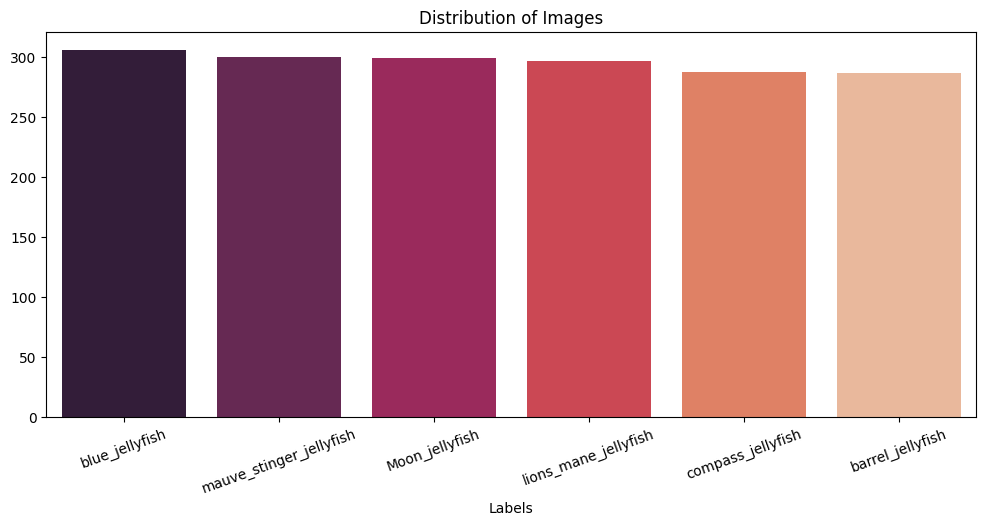

In [5]:
label_count = df['Labels'].value_counts()

plt.figure(figsize=(12,5))
plt.title('Distribution of Images')
sns.barplot(x=label_count.index, y=label_count.values, hue=label_count.index, palette='rocket')
plt.xticks(rotation=20)

plt.show()

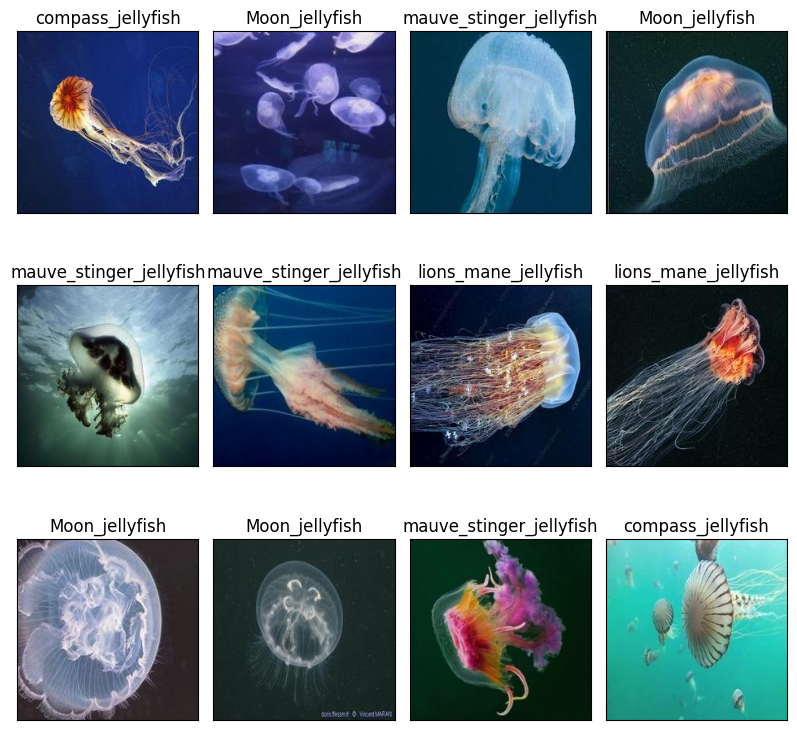

In [6]:
random_indexes = np.random.randint(0, len(df), 12)

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(8,8), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
  ax.imshow(plt.imread(df['File_Paths'][random_indexes[i]]))
  ax.set_title(df['Labels'][random_indexes[i]])

plt.tight_layout()
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df['File_Paths'], df['Labels'], test_size=0.2, shuffle=True, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1421,), (356,), (1421,), (356,))

In [8]:
label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

In [10]:
categories = len(set(df['Labels']))

categories

6

In [11]:
y_train_encoded = to_categorical(y_train_encoded, categories)
y_test_encoded = to_categorical(y_test_encoded, categories)

In [12]:
X_train.shape, X_test.shape, y_train_encoded.shape, y_test_encoded.shape

((1421,), (356,), (1421, 6), (356, 6))

In [17]:
df_train = pd.DataFrame({
    'Filepath': X_train,
    'Label': y_train
})

df_test = pd.DataFrame({
    'Filepath': X_test,
    'Label': y_test
})

df_train['Filepath'] = df_train['Filepath'].astype(str)
df_test['Filepath'] = df_test['Filepath'].astype(str)

df_train['Label'] = df_train['Label'].astype(str)
df_test['Label'] = df_test['Label'].astype(str)

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=df_train,
    directory=None,
    x_col='Filepath',
    y_col='Label',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_dataframe(
    dataframe=df_test,
    directory=None,
    x_col='Filepath',
    y_col='Label',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


Found 1421 validated image filenames belonging to 6 classes.
Found 356 validated image filenames belonging to 6 classes.


In [18]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(categories, activation='softmax')
])

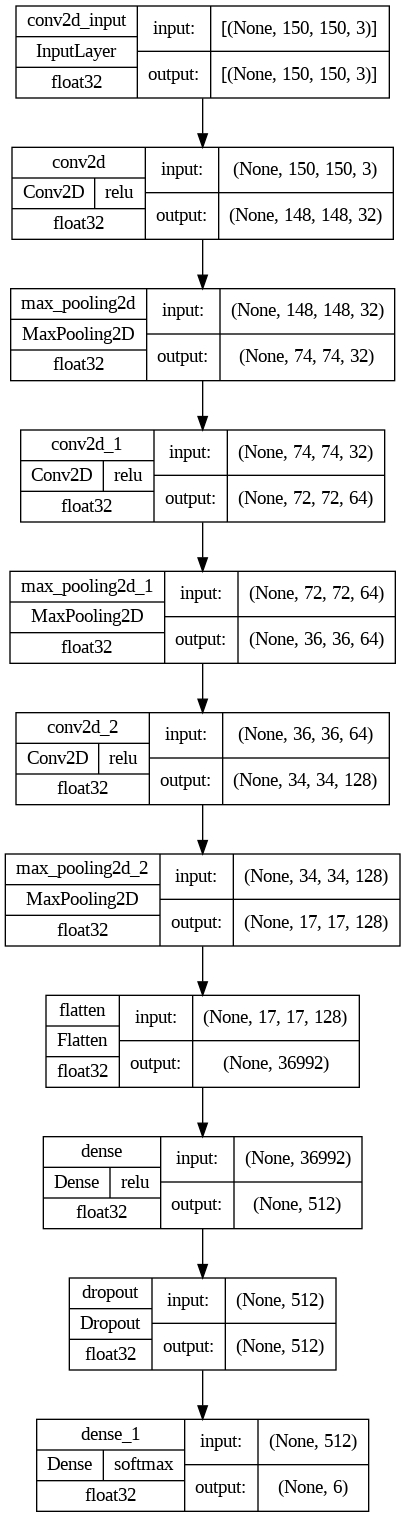

In [19]:
plot_model(model, show_dtype=True, show_layer_activations=True, show_shapes=True)

In [20]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [22]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/5
44/44 [==============================] - 106s 2s/step - loss: 1.5305 - accuracy: 0.3765 - val_loss: 1.3547 - val_accuracy: 0.4517
Epoch 2/5
44/44 [==============================] - 100s 2s/step - loss: 1.1450 - accuracy: 0.5666 - val_loss: 0.9051 - val_accuracy: 0.6562
Epoch 3/5
44/44 [==============================] - 95s 2s/step - loss: 0.8103 - accuracy: 0.7055 - val_loss: 0.6923 - val_accuracy: 0.7330
Epoch 4/5
44/44 [==============================] - 94s 2s/step - loss: 0.5230 - accuracy: 0.8200 - val_loss: 0.5414 - val_accuracy: 0.8011
Epoch 5/5
44/44 [==============================] - 99s 2s/step - loss: 0.3205 - accuracy: 0.8934 - val_loss: 0.3909 - val_accuracy: 0.8835


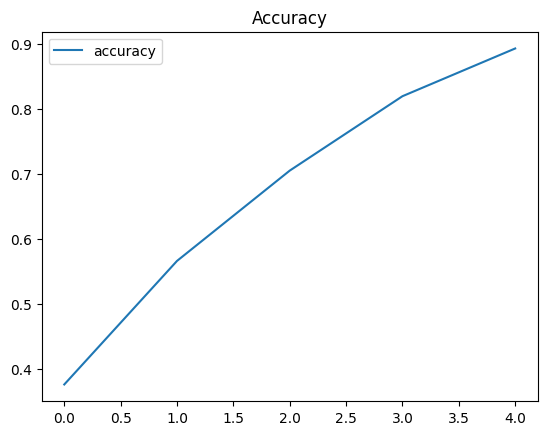

In [26]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.title('Accuracy')

plt.legend()
plt.show()

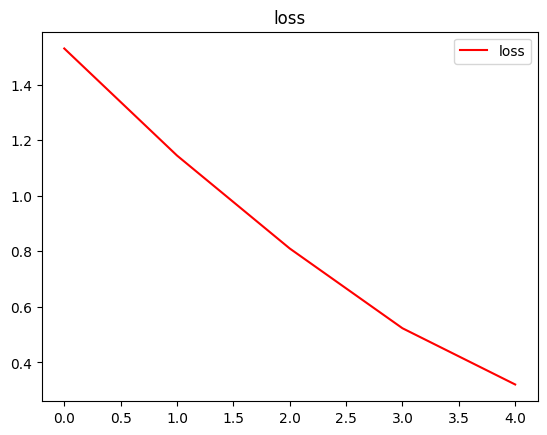

In [28]:
plt.plot(history.history['loss'], label='loss', c='r')
plt.title('loss')

plt.legend()
plt.show()

In [29]:
loss, accuracy = model.evaluate(validation_generator)
print(f'Test accuracy: {accuracy} Test Loss: {loss}')

12/12 [==============================] - 7s 559ms/step - loss: 0.3872 - accuracy: 0.8848
Test accuracy: 0.8848314881324768 Test Loss: 0.38716161251068115


In [35]:
def predict_random_image(model, generator, label_encoder):
    batch = next(generator)
    images, labels = batch

    idx = random.randint(0, len(images) - 1)

    plt.imshow(images[idx])
    actual_label = label_encoder.inverse_transform([np.argmax(labels[idx])])[0]
    plt.title(f'Actual: {actual_label}')
    plt.show()

    image = images[idx].reshape(1, 150, 150, 3)
    y_pred = model.predict(image)
    predicted_class = label_encoder.inverse_transform([np.argmax(y_pred)])

    print(f'Prediction probabilities: {y_pred}')
    print(f'Predicted class: {predicted_class[0]}')

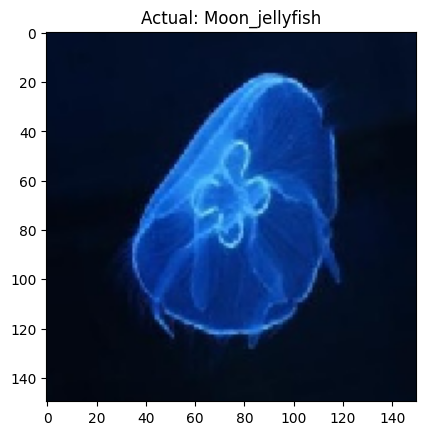

1/1 [==============================] - 0s 63ms/step
Prediction probabilities: [[9.7332126e-01 2.4954451e-04 2.6405877e-02 8.3828610e-08 7.5893752e-07
  2.2408984e-05]]
Predicted class: Moon_jellyfish


In [62]:
predict_random_image(model, validation_generator, label_encoder)